Objetive:
Our goal is to find how quantity of each item in each province, changes from each month and year. During milestone 1, we try to finish all the preprocessing steps and draw necessary graphs for insights. We will try to build the model and make predictions in milestone 2 and later stages. 

In [ ]:
#Import Files
from google.colab import files
uploaded = files.upload()

Saving item.csv to item.csv
Saving train.csv to train.csv


In [ ]:
#Read data
import pandas as pd
import numpy as np
df_item = pd.read_csv('item.csv')
df_train = pd.read_csv('train.csv')
print(df_item)
print(df_train)


     item_id brand_id  brandfamily_id  package_id info_id
0          1  [6, 14]               1           1     BHS
1          6  [6, 19]               2           1     BHM
2         54  [6, 14]               1           1     BHS
3         15  [6, 19]               2           1     BHM
4        108     [19]               3           1     MQB
..       ...      ...             ...         ...     ...
113       78   [6, 8]               4           4    BZMN
114        5     [11]               5           1     HGO
115       83     [19]               3           1     MQB
116       87     [19]               3           2     MQB
117       12     [19]               3           4     MQB

[118 rows x 5 columns]
          datetime  order_id  user_id  item_id  province_id  city_id  quantity
0       2017-01-02      8806      404        1            2       19  8.298021
1       2017-01-02     22552      404        1            2       19  8.298021
2       2017-01-02       494      489      

We find that our two tales have a common column called id, we need to combine them in order to continue the analysis.

In [ ]:
#Data integrity
df_wine = pd.merge(df_item,df_train, on = 'item_id')
df_wine

,item_id,brand_id,brandfamily_id,package_id,info_id,datetime,order_id,user_id,province_id,city_id,quantity
0,1,"[6, 14]",1,1,BHS,2017-01-02,8806,404,2,19,8.298021
1,1,"[6, 14]",1,1,BHS,2017-01-02,22552,404,2,19,8.298021
2,1,"[6, 14]",1,1,BHS,2017-01-06,54066,395,0,10,0.377183
3,1,"[6, 14]",1,1,BHS,2017-01-07,67828,377,0,4,0.754366
4,1,"[6, 14]",1,1,BHS,2017-01-10,4205,349,0,9,3.017462
...,...,...,...,...,...,...,...,...,...,...,...
145190,12,[19],3,4,MQB,2020-09-21,52082,18,0,10,3.643725
145191,12,[19],3,4,MQB,2020-09-26,11453,450,0,10,1.457490
145192,12,[19],3,4,MQB,2020-09-11,58771,262,0,10,2.914980
145193,12,[19],3,4,MQB,2020-09-12,33368,248,0,10,1.457490


The join result get a table with 145195 rows and 11 columns, which is good

In [ ]:
#Explode composite values
from ast import literal_eval
df_wine['brand_id'] = df_wine['brand_id'].astype(str)
df_wine['brand_id'] = df_wine['brand_id'].apply(literal_eval)
df_wine = df_wine.explode('brand_id')
df_wine

,item_id,brand_id,brandfamily_id,package_id,info_id,datetime,order_id,user_id,province_id,city_id,quantity
0,1,6,1,1,BHS,2017-01-02,8806,404,2,19,8.298021
0,1,14,1,1,BHS,2017-01-02,8806,404,2,19,8.298021
1,1,6,1,1,BHS,2017-01-02,22552,404,2,19,8.298021
1,1,14,1,1,BHS,2017-01-02,22552,404,2,19,8.298021
2,1,6,1,1,BHS,2017-01-06,54066,395,0,10,0.377183
...,...,...,...,...,...,...,...,...,...,...,...
145190,12,19,3,4,MQB,2020-09-21,52082,18,0,10,3.643725
145191,12,19,3,4,MQB,2020-09-26,11453,450,0,10,1.457490
145192,12,19,3,4,MQB,2020-09-11,58771,262,0,10,2.914980
145193,12,19,3,4,MQB,2020-09-12,33368,248,0,10,1.457490


We find that brand_id has composite items(it is a list), wh need to change its types to numeric. Explode the lists to get more rows(217723)

In [ ]:
#Data Cleaning

#Check Data Type
df_wine.dtypes

item_id             int64
brand_id           object
brandfamily_id      int64
package_id          int64
info_id            object
datetime           object
order_id            int64
user_id             int64
province_id         int64
city_id             int64
quantity          float64
dtype: object

We check the types find that some types are unclear, they are object which are hard to handle

In [ ]:
from datetime import datetime
#Convert types 
df_wine['brand_id'] = df_wine['brand_id'].astype(int)
df_wine['info_id'] = df_wine['info_id'].astype('category')
df_wine['datetime'] = pd.to_datetime(df_wine['datetime'], format='%Y-%m-%d')
df_wine.dtypes

item_id                    int64
brand_id                   int64
brandfamily_id             int64
package_id                 int64
info_id                 category
datetime          datetime64[ns]
order_id                   int64
user_id                    int64
province_id                int64
city_id                    int64
quantity                 float64
dtype: object

In [ ]:
# Convert string id to numeric 
df_wine['info_id'] = df_wine['info_id'].cat.codes

In [ ]:
df_wine['info_id'] = df_wine['info_id'].astype(int)
df_wine.dtypes

item_id                    int64
brand_id                   int64
brandfamily_id             int64
package_id                 int64
info_id                    int64
datetime          datetime64[ns]
order_id                   int64
user_id                    int64
province_id                int64
city_id                    int64
quantity                 float64
dtype: object

We try to make sure every id is int. Convert brand_id to int. Cast info_id into category then convert into int. Convert the datetime from object to datetime object.

In [ ]:
#Cleaning NA values

df_wine.dropna(axis = 0, how = "any")
df_wine

,item_id,brand_id,brandfamily_id,package_id,info_id,datetime,order_id,user_id,province_id,city_id,quantity
0,1,6,1,1,3,2017-01-02,8806,404,2,19,8.298021
0,1,14,1,1,3,2017-01-02,8806,404,2,19,8.298021
1,1,6,1,1,3,2017-01-02,22552,404,2,19,8.298021
1,1,14,1,1,3,2017-01-02,22552,404,2,19,8.298021
2,1,6,1,1,3,2017-01-06,54066,395,0,10,0.377183
...,...,...,...,...,...,...,...,...,...,...,...
145190,12,19,3,4,11,2020-09-21,52082,18,0,10,3.643725
145191,12,19,3,4,11,2020-09-26,11453,450,0,10,1.457490
145192,12,19,3,4,11,2020-09-11,58771,262,0,10,2.914980
145193,12,19,3,4,11,2020-09-12,33368,248,0,10,1.457490


We check NA thourgh all rows and columns. We fine that there is no missing values at all, which means the table is good itself.

In [ ]:

#Check negative values


print("The unusual values for item id:",df_wine[ df_wine.iloc[: , 0] < 0 ])
print("The unusual values for brand id:",df_wine[ df_wine.iloc[: , 1] < 0 ])
print("The unusual values for brandfamily id:",df_wine[ df_wine.iloc[: , 2] < 0 ])
print("The unusual values for package id:",df_wine[ df_wine.iloc[: , 3] < 0 ])
print("The unusual values for order id:",df_wine[ df_wine.iloc[: , 6] < 0 ])
print("The unusual values for user id:",df_wine[ df_wine.iloc[: , 7] < 0 ])
print("The unusual values for province id:",df_wine[ df_wine.iloc[: , 8] < 0 ])
print("The unusual values for city id:",df_wine[ df_wine.iloc[: , 9] < 0 ])
print("The unusual values for quantity :",df_wine[ df_wine.iloc[: , 10] < 0 ])



The unusual values for item id: Empty DataFrame
Columns: [item_id, brand_id, brandfamily_id, package_id, info_id, datetime, order_id, user_id, province_id, city_id, quantity]
Index: []
The unusual values for brand id: Empty DataFrame
Columns: [item_id, brand_id, brandfamily_id, package_id, info_id, datetime, order_id, user_id, province_id, city_id, quantity]
Index: []
The unusual values for brandfamily id: Empty DataFrame
Columns: [item_id, brand_id, brandfamily_id, package_id, info_id, datetime, order_id, user_id, province_id, city_id, quantity]
Index: []
The unusual values for package id: Empty DataFrame
Columns: [item_id, brand_id, brandfamily_id, package_id, info_id, datetime, order_id, user_id, province_id, city_id, quantity]
Index: []
The unusual values for order id: Empty DataFrame
Columns: [item_id, brand_id, brandfamily_id, package_id, info_id, datetime, order_id, user_id, province_id, city_id, quantity]
Index: []
The unusual values for user id: Empty DataFrame
Columns: [item_

We check whether there are negative values in every id columns and also quantity columns(not alllowed, should be removed as they are unusual values). The good news is that there is no negative values through those columns.

In [ ]:
#split date
df_wine.insert(0, 'month',  df_wine['datetime'].dt.month) 
df_wine.insert(0, 'year',  df_wine['datetime'].dt.year) 
df_wine.insert(0, 'date', pd.to_datetime(df_wine[['year', 'month']].assign(DAY=1))) 
df_wine = df_wine.drop('datetime', axis=1)
df_wine = df_wine.drop('year', axis=1)
df_wine = df_wine.drop('month', axis=1)
df_wine

,date,item_id,brand_id,brandfamily_id,package_id,info_id,order_id,user_id,province_id,city_id,quantity
0,2017-01-01,1,6,1,1,3,8806,404,2,19,8.298021
0,2017-01-01,1,14,1,1,3,8806,404,2,19,8.298021
1,2017-01-01,1,6,1,1,3,22552,404,2,19,8.298021
1,2017-01-01,1,14,1,1,3,22552,404,2,19,8.298021
2,2017-01-01,1,6,1,1,3,54066,395,0,10,0.377183
...,...,...,...,...,...,...,...,...,...,...,...
145190,2020-09-01,12,19,3,4,11,52082,18,0,10,3.643725
145191,2020-09-01,12,19,3,4,11,11453,450,0,10,1.457490
145192,2020-09-01,12,19,3,4,11,58771,262,0,10,2.914980
145193,2020-09-01,12,19,3,4,11,33368,248,0,10,1.457490


We split the date into year and month, and combine agian,  as our target is to predict through year and month(day is not important)

In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
print(df_wine.iloc[:,1:10])
data_scaled = pd.DataFrame(preprocessing.scale(df_wine.iloc[:,1:10]),columns = df_wine.iloc[:,1:10].columns) 
df_array = np.array(df_wine.iloc[:,1:10])
X_std = StandardScaler().fit_transform(df_array)
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
principalComponents = pca.fit_transform(X_std)
print("PCA Variance",pca.explained_variance_)
print("PCA Variance",pca.explained_variance_ratio_)
print("Cumulative PCA Variance",np.cumsum(pca.explained_variance_ratio_))
principalDf = pd.DataFrame(data = principalComponents)
principalDf
result = pd.DataFrame(pca.components_,columns=data_scaled.columns)
print(result.abs().max(axis=1))
result.abs()





        item_id  brand_id  brandfamily_id  ...  user_id  province_id  city_id
0             1         6               1  ...      404            2       19
0             1        14               1  ...      404            2       19
1             1         6               1  ...      404            2       19
1             1        14               1  ...      404            2       19
2             1         6               1  ...      395            0       10
...         ...       ...             ...  ...      ...          ...      ...
145190       12        19               3  ...       18            0       10
145191       12        19               3  ...      450            0       10
145192       12        19               3  ...      262            0       10
145193       12        19               3  ...      248            0       10
145194       12        19               3  ...       24            0       10

[217723 rows x 9 columns]
PCA Variance [2.195108   1.41419053 1

,item_id,brand_id,brandfamily_id,package_id,info_id,order_id,user_id,province_id,city_id
0,0.164332,0.215754,0.437702,0.233244,0.461678,0.003648,0.175950,0.491384,0.441455
1,0.080783,0.362929,0.537006,0.363326,0.290273,0.004152,0.313953,0.415703,0.292786
2,0.327734,0.565828,0.019998,0.422918,0.420033,0.018186,0.196691,0.094792,0.410778
3,0.775233,0.151937,0.206385,0.445190,0.326179,0.042459,0.052618,0.118692,0.100434


We know  province_id,  brandfamily_id,  brand_id, item_id are most important features from PCA . As our main target is to predict each item in each province through each month and year, we will try to remove unnecessary columns.

In [ ]:
#dimension reduction
df_wine = df_wine.drop([ 'package_id', 'info_id', 'order_id', 'user_id', 'city_id'], axis=1)
df_wine

,date,item_id,brand_id,brandfamily_id,province_id,quantity
0,2017-01-01,1,6,1,2,8.298021
0,2017-01-01,1,14,1,2,8.298021
1,2017-01-01,1,6,1,2,8.298021
1,2017-01-01,1,14,1,2,8.298021
2,2017-01-01,1,6,1,0,0.377183
...,...,...,...,...,...,...
145190,2020-09-01,12,19,3,0,3.643725
145191,2020-09-01,12,19,3,0,1.457490
145192,2020-09-01,12,19,3,0,2.914980
145193,2020-09-01,12,19,3,0,1.457490


We remove the columns  'package_id', 'info_id', 'order_id', 'user_id', 'city_id' from the tables. They are  insensitive to analysis and also not our anylysis focus in the prediction.

In [ ]:
df_wine = df_wine.groupby(['date', 'province_id', 'item_id','brand_id','brandfamily_id'])['quantity'].sum().reset_index(name='quantity')
df_wine


,date,province_id,item_id,brand_id,brandfamily_id,quantity
0,2017-01-01,0,1,6,1,421.313155
1,2017-01-01,0,1,14,1,421.313155
2,2017-01-01,0,2,11,5,5.654450
3,2017-01-01,0,15,6,2,117.478060
4,2017-01-01,0,15,19,2,117.478060
...,...,...,...,...,...,...
8579,2020-12-01,2,109,6,2,46.565716
8580,2020-12-01,2,109,19,2,46.565716
8581,2020-12-01,2,110,13,9,128.102211
8582,2020-12-01,2,111,6,2,23.734884


We aggregate the quantity through all remaning columns to get how each item in each province varies through each month and year.

In [ ]:
import seaborn as sns

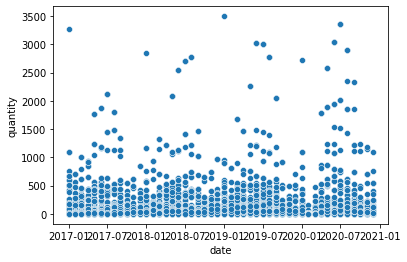

In [ ]:
#Visulize Outliers
sns.scatterplot(x='date', y='quantity', data=df_wine)


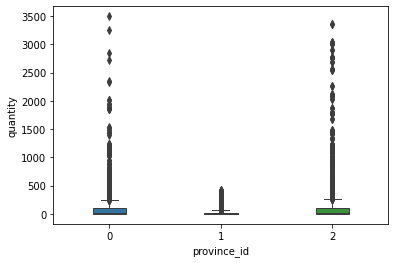

In [ ]:
sns.boxplot(x = 'province_id', y='quantity', data=df_wine , width = 0.3, linewidth = 1)

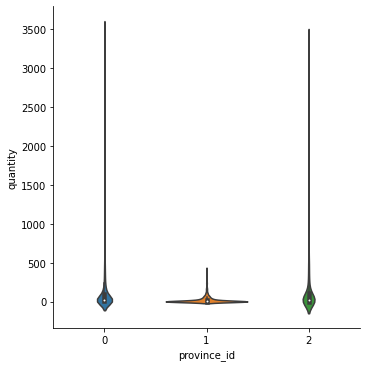

In [ ]:
# Violin plots
sns.catplot(x = 'province_id', y='quantity', data=df_wine, kind="violin")

Obviouslly the graphs look not normal and has a lot of outliers and one side, we need to handle them immediatelly

In [ ]:
Q1 = df_wine['quantity'].quantile(0.25)
Q3 = df_wine['quantity'].quantile(0.75)
IQR = Q3 - Q1
index = df_wine[(df_wine['quantity'] < (Q1 - 1.5 * IQR)) |(df_wine['quantity'] > (Q3 + 1.5 * IQR))].index
df_wine.drop(index, inplace=True)
df_wine

,date,province_id,item_id,brand_id,brandfamily_id,quantity
2,2017-01-01,0,2,11,5,5.654450
3,2017-01-01,0,15,6,2,117.478060
4,2017-01-01,0,15,19,2,117.478060
5,2017-01-01,0,18,19,3,57.459522
6,2017-01-01,0,19,11,5,43.250291
...,...,...,...,...,...,...
8579,2020-12-01,2,109,6,2,46.565716
8580,2020-12-01,2,109,19,2,46.565716
8581,2020-12-01,2,110,13,9,128.102211
8582,2020-12-01,2,111,6,2,23.734884


Through outliers drop we remove around  1100 rows through the IQR rule. We then check through visulization agian.

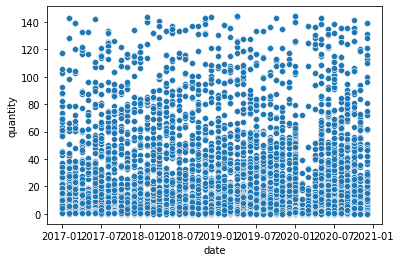

In [ ]:
sns.scatterplot(x='date', y='quantity', data=df_wine)

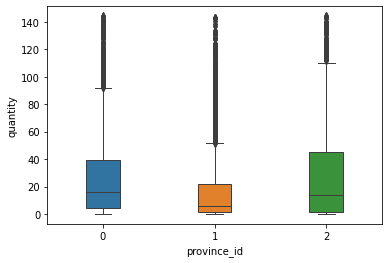

In [ ]:
sns.boxplot(x = 'province_id', y='quantity', data=df_wine , width = 0.3, linewidth = 1)

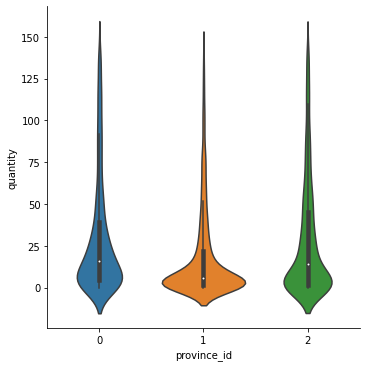

In [ ]:
sns.catplot(x = 'province_id', y='quantity', data=df_wine, kind="violin")

We still get some quantities whcih are large. However, the overall perfomence is much better. There are much fewer values beyond.

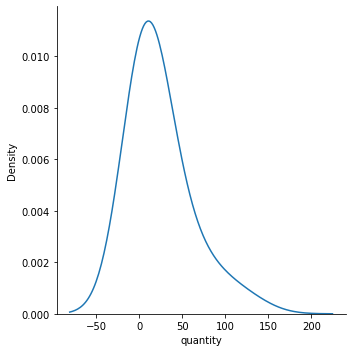

In [ ]:
#Data Visulization

sns.displot(df_wine, x='quantity', kind = 'kde',bw_adjust = 5)

From density plot of quantity, we see that most quantity are small and near 0, only a small part are large

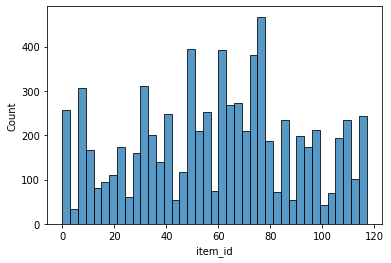

In [ ]:
sns.histplot(df_wine, x='item_id', binwidth = 3, bins=df_wine['item_id'].nunique())

We plot the histgrams through id and find there is huge difference between each item. 

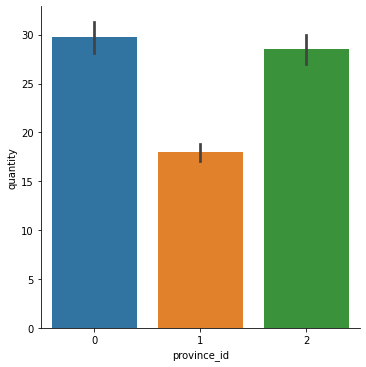

In [ ]:
sns.catplot(x='province_id', y='quantity', kind="bar", data=df_wine)

Use bar chart we find that province 0 has most quantities, follwed by province 2. Province 1 has least quantity.

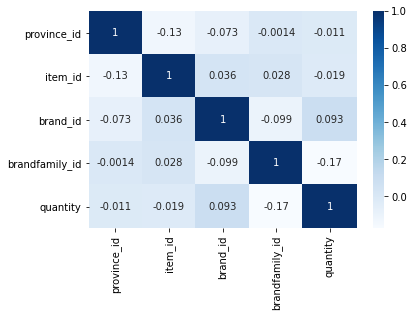

In [ ]:
sns.heatmap(df_wine.corr(), annot=True, cmap="Blues")


From the heatmap, we find that there is not much direct relationship between each predictor(and also quantity). We can say they are almost indenpendent with each other.

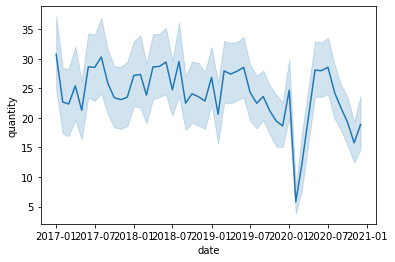

In [ ]:
sns.lineplot(data = df_wine, x='date', y='quantity')

We have a sense of how overall quantity varies with month and year. It drops sharplly at begenning of Covid-19,(2020-01), then recovers.

In [ ]:
from google.colab import drive
drive.mount('drive')
#df_wine.to_csv('My Drive/Colab Notebooks/IE7275/Project/wine.csv')
df_wine.to_csv('/content/drive/MyDrive/Colab Notebooks/IE7275/Project/wine.csv')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


Save the new table to google drive and download in convenience of future use.